# Paris Housing Class Prediction

## About Dataset

This is a set of data created from imaginary data of house prices in an urban environment - Paris
The idea was to create a dataset that is good for classification and that gives adequate results. This project is not a real-life situation as the data set is an imaginary dataset. This is recommended for educational purposes, for practice and to acquire the necessary knowledge. To know more https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification- 

### Import Libraries

The import libraries section in a machine learning (ML) project typically involves importing all the necessary libraries and modules used throughout the project for tasks such as data manipulation, preprocessing, model building, evaluation, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Load the Dataset

In this section of this machine learning (ML) project, my primary focus is to use the Pandas library to import, load, and organize the dataset into a format that is suitable for analysis and modeling.

In [2]:
dataset = pd.read_csv("Data/ParisHousingClass.csv")

In [3]:
dataset.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


### Data Cleaning

Data cleaning in machine learning (ML) refers to the process of identifying and correcting errors, inconsistencies, and missing values in a dataset to prepare it for analysis and modeling

#### .info() method-

The info() method in pandas is used to display a concise summary of a DataFrame, including the data types of each column, the number of non-null values, and memory usage. It's useful for understanding the structure of your dataset and identifying any missing or inconsistent data. This is done to have a visual understanding of any possible null values, and data types to be corrected.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

#### .duplicated() method

Checking for duplicates in a dataset is crucial in machine learning because duplicates can skew the analysis and model training, leading to inaccurate and biased results.

In [5]:
dataset.duplicated().sum()

0

### Statistical Analysis of the Dataset

In this section, I perform a statistical analysis using the describe() function. This is a crucial step in understanding the characteristics and properties of the dataset.

In [6]:
dataset.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


### Copy the training dataset

When preparing data for ML models, it's crucial to maintain the integrity of the original dataset, especially when experimenting with different preprocessing techniques or feature engineering steps. By using the copy() method, you create a separate copy of the dataset in memory, ensuring that any changes made to the copied dataset do not affect the original dataset. This helps to prevent unintended side effects and ensures reproducibility in your data processing pipeline.

In [7]:
copied_dataset = dataset.copy()

### Visualization - To see the relationship between our variables

In the visualization section of this machine learning project, I used a pie chart to visualize the distribution of the target column. I also used a heatmap to depict the correlation between the target variable and all other features in the dataset, aiding in understanding data distribution and feature relevance. I also plot individual bar charts for each of the columns with a high correlation with the target column, aiding in understanding the range, spread, and potential skewness of the data. 

In [8]:
copied_dataset["category"].value_counts()

category
Basic     8735
Luxury    1265
Name: count, dtype: int64

##### Pie Chart of target from training dataset

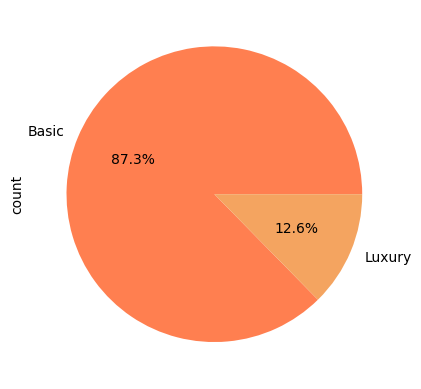

In [9]:
round(dataset['category'].value_counts()/copied_dataset.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['coral', 'sandybrown'])

# Save the pie chart as an image file
plt.savefig('pie_chart.png')

# Display the plot (optional, if you want to see it in the output)
plt.show();

##### Plot of correlation (Heatmap) - To visualize the overall correlation between target and all other variables

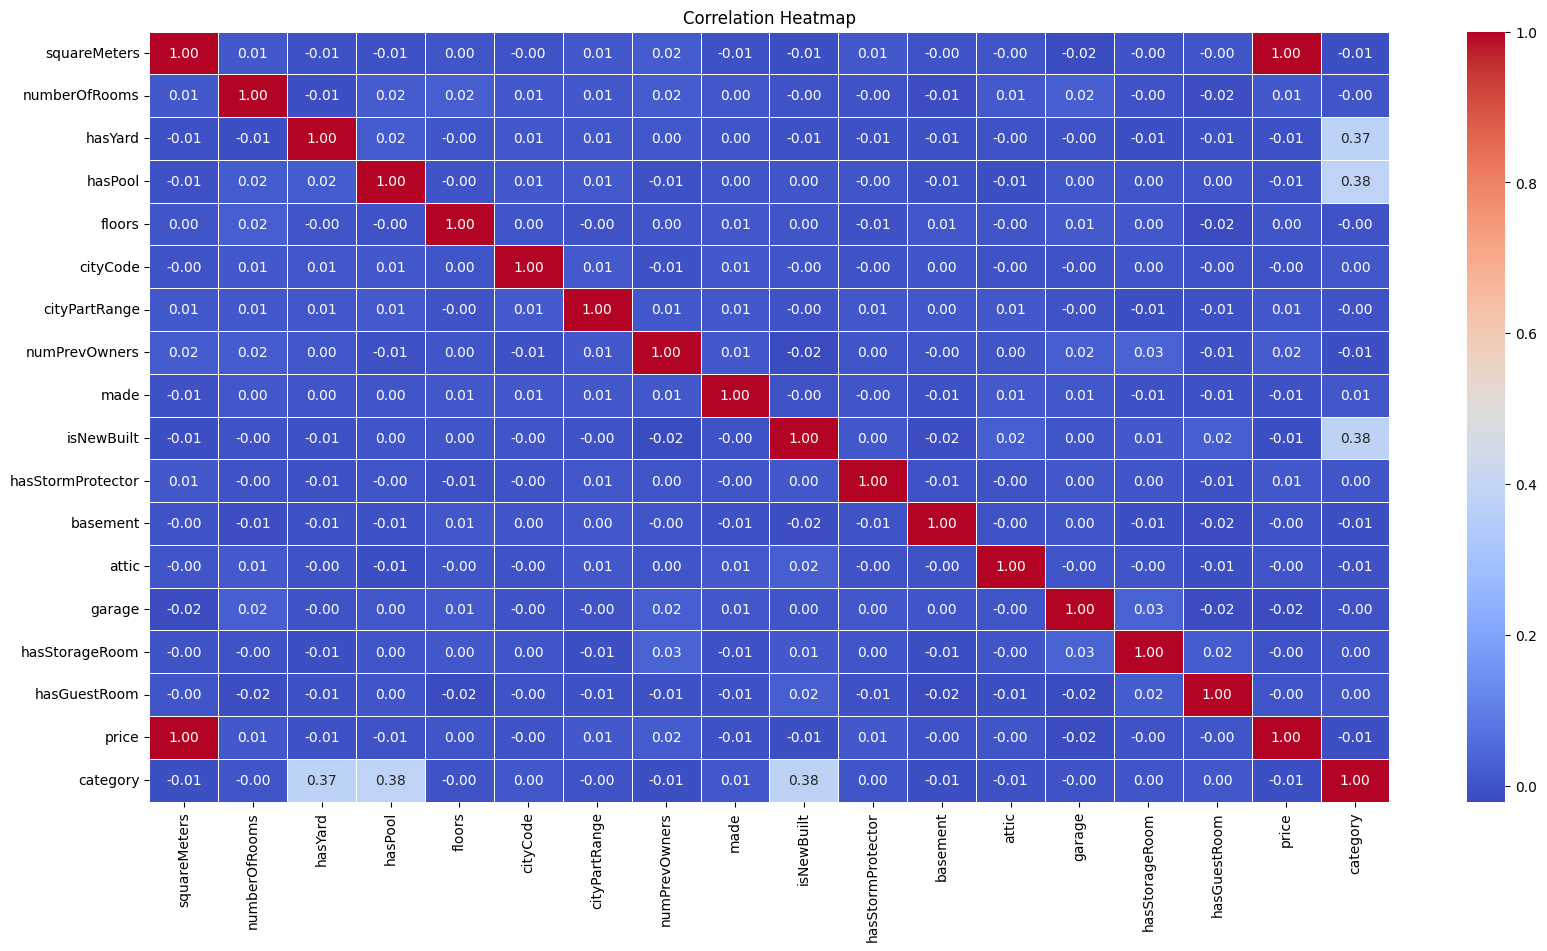

In [10]:
#To convert the target column to 1 and zero
copied_dataset['category'].replace({'Basic': 0, 'Luxury': 1}, inplace=True)

# Calculate the correlation matrix
correlation_matrix = copied_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

#Save the image below
plt.savefig("Correlation Heatmap.png",dpi = 300,bbox_inches ="tight")

plt.show()

I noticed from this correlation matrix that our target variable is strongly related to the "hasYard", "hasPool", and "isNewBuilt" columns. Additionally, there is a strong relationship between "price" and "squareMeters", so we should consider removing one of them (price) to avoid redundancy. Also, I will plot graphs of "hasYard", "hasPool", and "isNewBuilt" columns  all against the target since they are highly correlated so we can see a better and deeper view of the relationships. 

In [11]:
final_copied = copied_dataset.drop('price', axis = 1) #To drop the column 'price'
final_copied.head() # To output the first five rows

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,0
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,1
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,0
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,0
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,1


##### Bar Plot of "hasYard" with category as the target

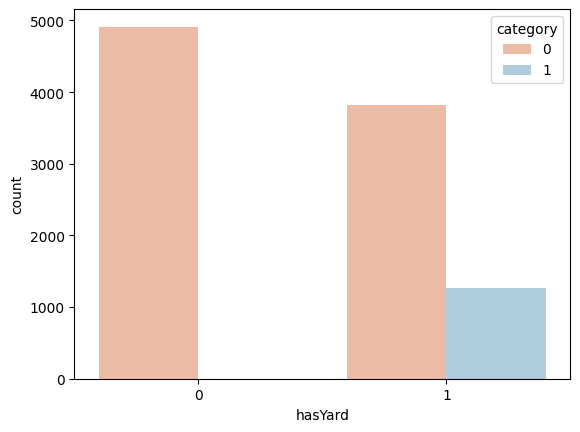

In [12]:
sns.countplot(x = final_copied["hasYard"], hue=final_copied["category"],palette="RdBu");

I observed that while every luxurious apartment comes with a yard, not all apartments with yards can be considered luxurious. Also, none of the basic houses has a yard.

##### Bar Plot of "hasPool" with category as the target

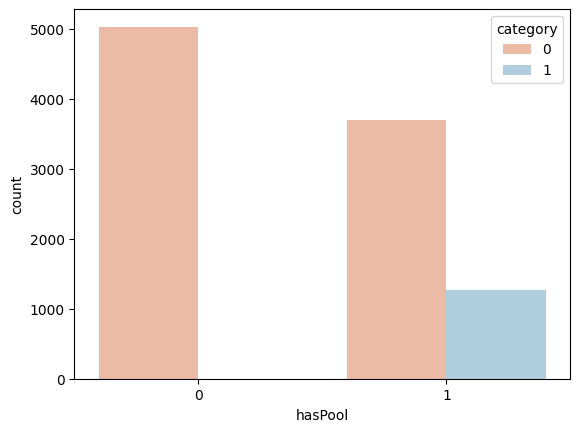

In [13]:
sns.countplot(x = final_copied["hasPool"], hue=final_copied["category"],palette="RdBu");

Just as it is observed for 'hasYard', I could also see that while every luxurious apartment comes with a pool, not all apartments with pool can be considered luxurious. Also, none of the basic houses has a pool.

##### Bar Plot of "isNewBuilt" with category as the target

<Axes: xlabel='isNewBuilt', ylabel='count'>

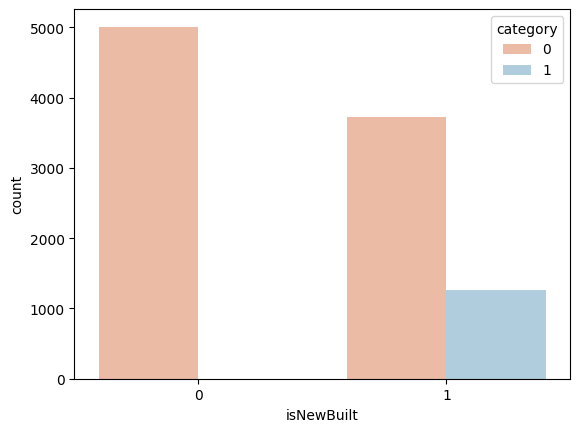

In [14]:
sns.countplot(x = final_copied["isNewBuilt"], hue=final_copied["category"],palette="RdBu")

Also, as it is observed for both 'hasYard' and 'hasPool', I could see that while every luxurious apartment is newly built, not all newly built apartments can be considered luxurious. Also, none of the basic houses is newly built.

### Defining X and y 

In this section, I divided the dataset into X and y. As per standard, when building a machine learning model, one of the initial steps is to divide the dataset into two main components: the feature matrix (often denoted as X) and the target variable (often denoted as y).

In [15]:
X = final_copied.drop("category",axis=1)
y =final_copied["category"]

### Standardize X

Standardization, or feature scaling, is crucial before fitting data into machine learning models because it ensures that all features contribute equally to the model training process, preventing features with larger scales from dominating those with smaller scales.

In [16]:
scaler = StandardScaler()

# Fit and transform the DataFrame
scaled_data_X = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
scaled_df_X = pd.DataFrame(scaled_data_X, columns=X.columns)

scaled_df_X.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0.891562,-1.643518,-1.017554,1.006421,0.440453,-1.408453,-0.874027,0.867593,-0.052484,-0.998202,1.0002,-0.250333,1.374130,1.537488,-1.006018,0.631373
1,1.073956,-0.394180,0.982749,1.006421,1.652041,-0.373880,0.866993,0.167441,1.021904,1.001802,-0.9998,-0.479772,-0.895592,-1.622370,0.994018,-0.942810
2,0.203033,0.265193,-1.017554,1.006421,-1.082685,-0.543643,0.170585,0.867593,1.666537,-0.998202,-0.9998,-0.728678,1.321265,-1.595657,0.994018,1.261046
3,-0.610092,-0.116549,-1.017554,-0.993620,-1.532703,-0.768361,1.563401,-0.532710,0.699588,-0.998202,1.0002,-1.520589,0.730080,-0.740816,-1.006018,-0.627973
4,0.714521,-1.088257,0.982749,1.006421,1.375106,-0.419941,-0.874027,0.517517,-1.664066,1.001802,-0.9998,1.182616,-0.898010,-0.996505,0.994018,-0.313136


#### Define Function to Evaluate the performance of the model

In this part, I created a function that helps me quickly check how well my model works. I'll be trying out three different methods - Logistic Regression, RandomforestRegressor, svm, and GaussianNB - to see which one works best for this project. Using this function saves me time because I won't have to write the same code multiple times.

In [17]:
def evaluate_preds(y_true,y_preds):
    '''
    Perform evaluation comparison on y_true labels ves y_pred labels on a classification
    '''
    accuracy = accuracy_score(y_true,y_preds) 
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 =f1_score(y_true,y_preds)
    metric_dict = {'accuracy':round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
          
    return metric_dict  

### Building Our Model

Here we are going to use four Model to train our dataset

- LogisticRegression
- RandomForestClassifier
- svm
- GaussianNB

### Logistic Regression Model

In [18]:
np.random.seed(42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df_X, y, test_size=0.2)

#Define model
Lr_model= LogisticRegression()


#Fit the model
Lr_model.fit(X_train, y_train)

LogisticRegression()

##### Evaluate Logistic Regression

In [19]:
y_pred = Lr_model.predict(X_test)

LR_Nor = evaluate_preds(y_test,y_pred)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


##### Visualize Using Confusion Matrix

In [20]:
confusion_matrix(y_test, y_pred)

array([[1744,    0],
       [   0,  256]], dtype=int64)

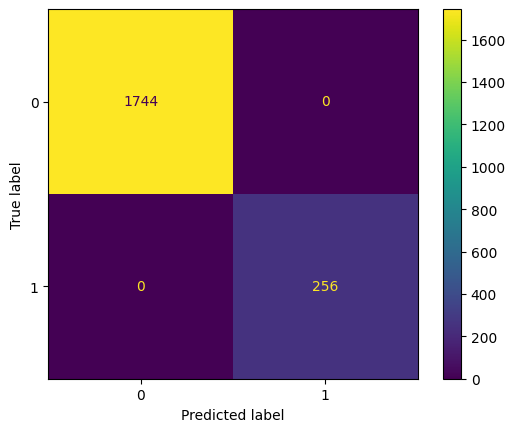

In [21]:
ConfusionMatrixDisplay.from_estimator(estimator =Lr_model , X = X_test, y = y_test);

#### Random Forest Classifier Model

In [22]:
np.random.seed(42)

#Define model
Rf_model= RandomForestClassifier()

#Fit the model
Rf_model.fit(X_train, y_train)

RandomForestClassifier()

##### Evaluate Random Forest Classifier

In [23]:
y_pred2 = Rf_model.predict(X_test)

Rf_Nor = evaluate_preds(y_test,y_pred2)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


##### Visualize Using Confusion Matrix

In [24]:
confusion_matrix(y_test, y_pred2)

array([[1744,    0],
       [   0,  256]], dtype=int64)

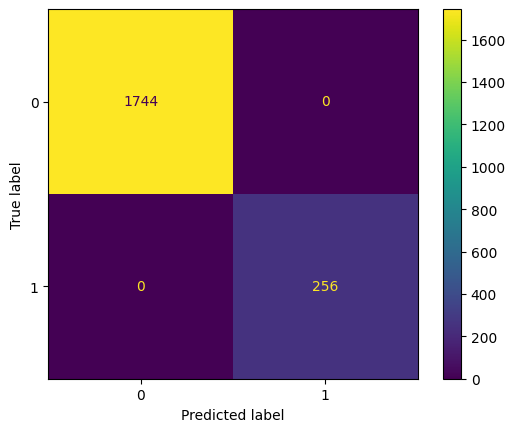

In [25]:
ConfusionMatrixDisplay.from_estimator(estimator =Rf_model , X = X_test, y = y_test);

#### SVM Model

In [26]:
np.random.seed(42)

#Define model
Svm_model = svm.SVC()

#Fit the model
Svm_model.fit(X_train, y_train)

SVC()

##### Evaluating our SVM Model

In [27]:
#Make prediction with the best hyperparameters
y_pred3 = Svm_model.predict(X_test)

#Evaluate the prediction
svm_Nor =evaluate_preds(y_test,y_pred3)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


##### Visualize Using Confusion Matrix

In [28]:
confusion_matrix(y_test, y_pred3)

array([[1744,    0],
       [   0,  256]], dtype=int64)

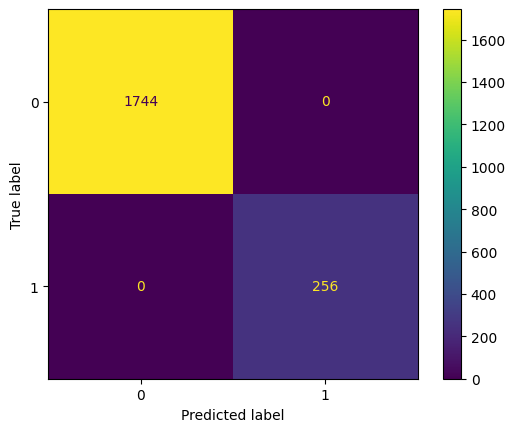

In [29]:
ConfusionMatrixDisplay.from_estimator(estimator =Svm_model , X = X_test, y = y_test);

#### Naive bayes Model

In [30]:
np.random.seed(42)

# Initialize the Gaussian Naive Bayes classifier
Nb_model = GaussianNB()
 
# Train the model
Nb_model.fit(X_train, y_train)

GaussianNB()

##### Evaluating our Naive Bayes Model

In [31]:
#Make prediction with the best hyperparameters
y_pred4 = Nb_model.predict(X_test)

#Evaluate the prediction
NB_Nor =evaluate_preds(y_test,y_pred4)

Accuracy:100.00%
Precision:1.00
Recall:1.00
F1 Score: 1.00


##### Visualize Using Confusion Matrix

In [32]:
confusion_matrix(y_test, y_pred4)

array([[1744,    0],
       [   0,  256]], dtype=int64)

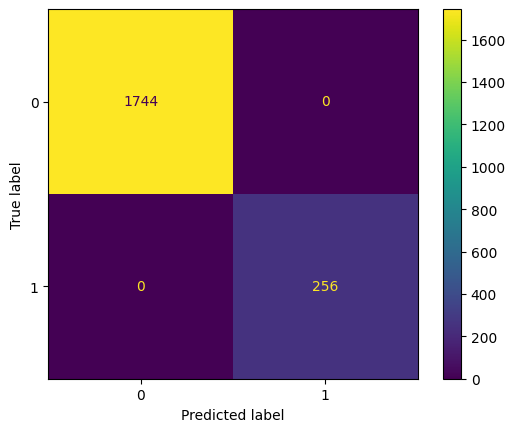

In [33]:
ConfusionMatrixDisplay.from_estimator(estimator =Nb_model , X = X_test, y = y_test);

### Compare the outcomes of our models

In [34]:
compare_matrics = pd.DataFrame({'baseline_LR': LR_Nor,
                                'baseline_RF': Rf_Nor,
                                'baseline_SVM': svm_Nor,
                                'baseline_NB': NB_Nor})
compare_matrics

,baseline_LR,baseline_RF,baseline_SVM,baseline_NB
accuracy,1.0,1.0,1.0,1.0
precision,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0
f1,1.0,1.0,1.0,1.0


### Conclusion

All models (baseline_LR, baseline_RF, baseline_SVM, baseline_NB) perform identically with perfect scores in accuracy, precision, recall, and f1; thus, any of these models is suitable for the project.